In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from CartPole_ import CartPole
from CartPoleNoise_ import CartPoleGaussianNoisyDyn, CartPoleGaussianNoisyObs, CartPoleGaussianNoisyObsDyn

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'image.cmap':'jet'
})

from NonLinearObserver_ import NonLinearObserver
from NonLinearController_ import NonLinearController

from shared import get_initial_states, plot_rollout, np_to_string, get_scan_states_ranges, plot_actual_and_predicted_states_contour

In [3]:
target = CartPole(False)


In [4]:
# Fit non linear controller

In [5]:
# Start by studying system without controller but apply an initial force

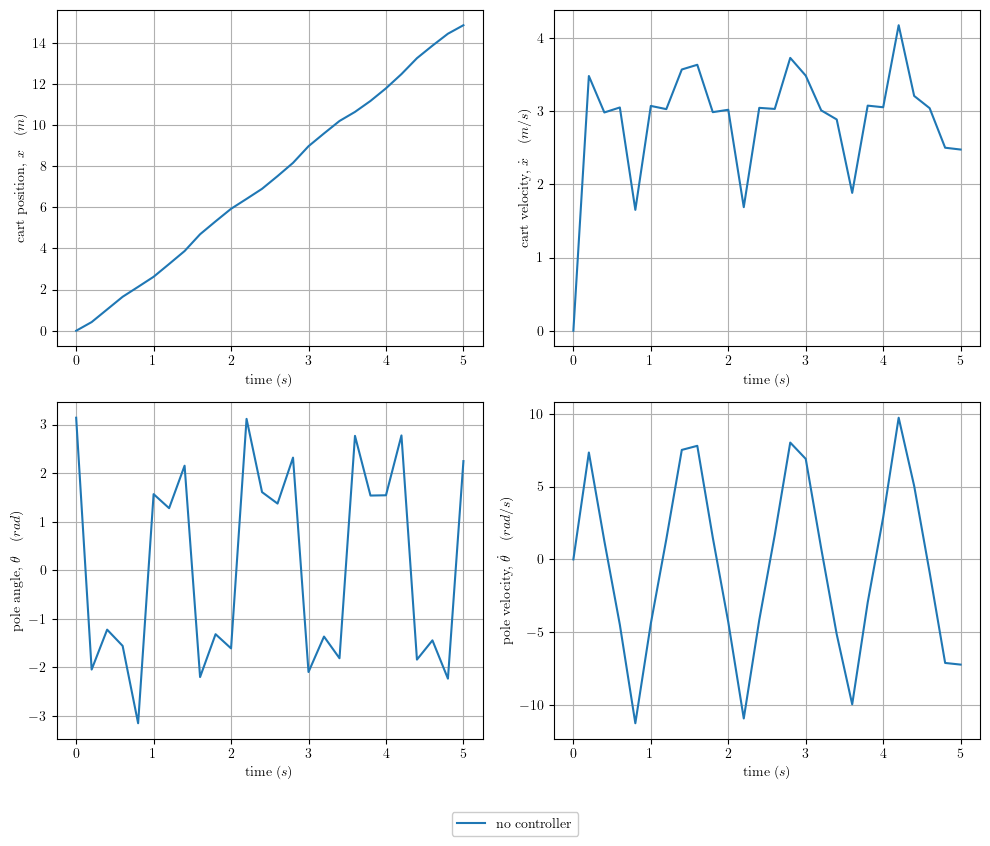

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

s0 = np.array([0, 0, np.pi, 0, 20])
x, y = target.simulate(state=s0, remap=True, time=5)

plot_rollout(x, y, axs, fig, label='no controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

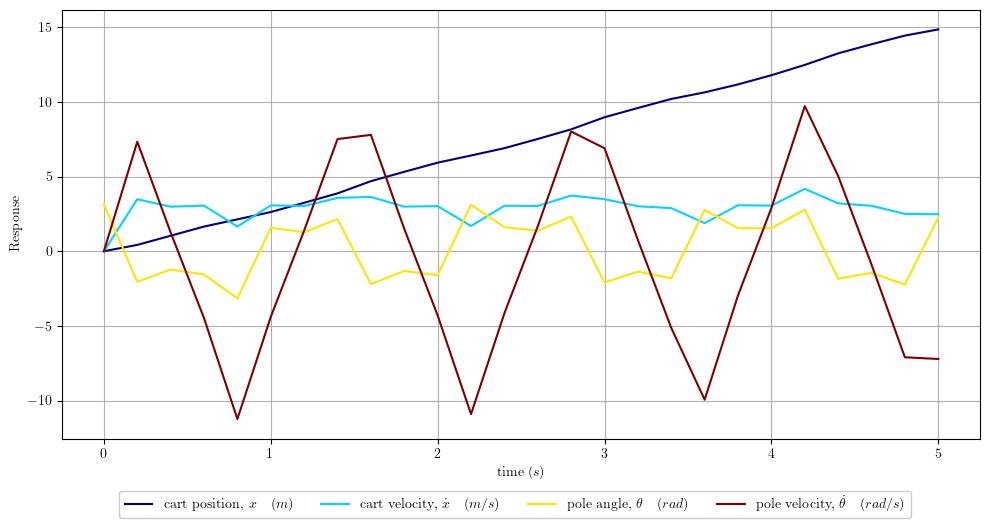

In [7]:
from shared import plot_rollout_single

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')


plot_rollout_single(x, y, ax, fig, color=colors, linestyle='solid', legend=True)

lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=4)
# fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]")

In [8]:
# Clearly, the model is unable to swing the pendulum towards the upright position
# even with the maximum force applied (20 N) at the start

[ 3.14159265 -1.85114242 -1.12421903 -2.08344376  3.1212083  -2.0401721
 -1.13130089 -1.89848451 -3.13357674 -2.23196885 -1.16962722 -1.73255847
 -3.06058594 -2.42080537 -1.23560757 -1.5874823  -2.94897024 -2.59935262
 -1.32518046 -1.46467645 -2.80721442 -2.7589909  -1.43421963 -1.36533939
 -2.64595034 -2.89138559 -1.55883593 -1.29038025 -2.47599544 -2.99044363
 -1.69552238 -1.24026601 -2.30621899 -3.05316221 -1.84113457 -1.21488552
 -2.14274843 -3.07911452 -1.99272881 -1.21348787 -1.9894195  -3.0695187
 -2.14729284 -1.23471189 -1.84860199 -3.02667556 -2.30141989 -1.27669367
 -1.72186758 -2.95392083 -2.45102324]


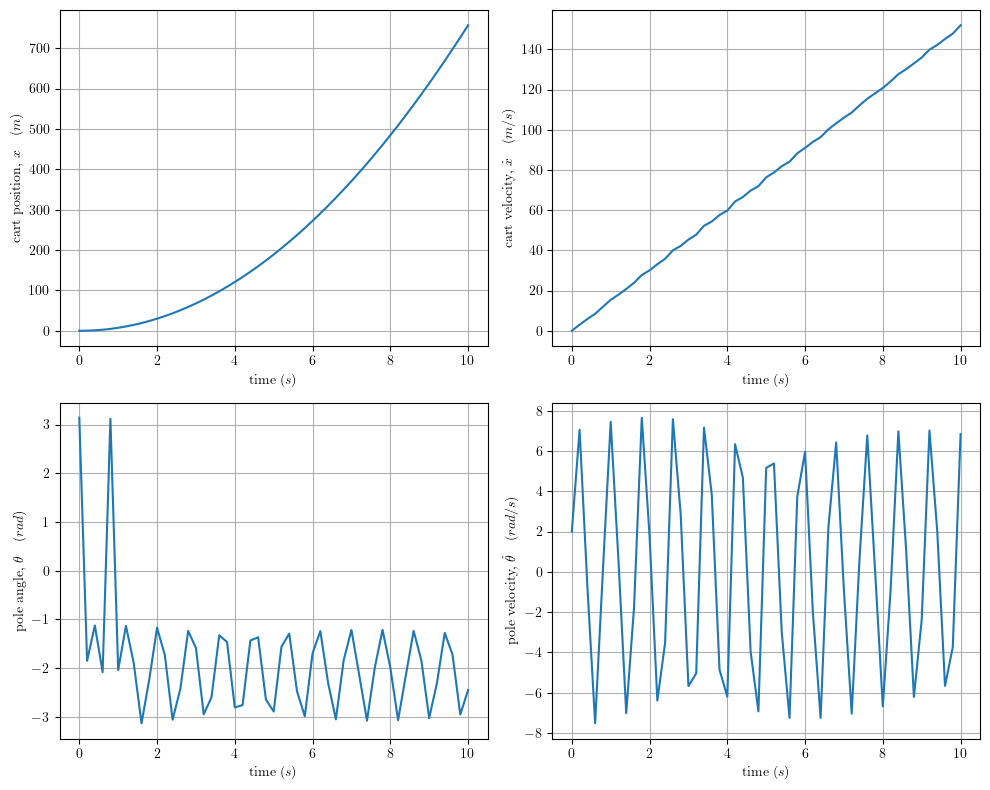

In [26]:
from shared import np_to_string

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

s0 = np.array([0, 0, np.pi, 2, 0])
action_seq2 = np.array([20] * 50)

x2, y2 = target.simulate_with_action(state=s0, action_seq=action_seq2, remap=True, time=10)

# plot_rollout(x, y, axs, fig, label=np_to_string(action_seq))
plot_rollout(x2, y2, axs, fig, label=np_to_string(action_seq2))
print(y2[:, 2])

# fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[(-10.0, 30.0)]

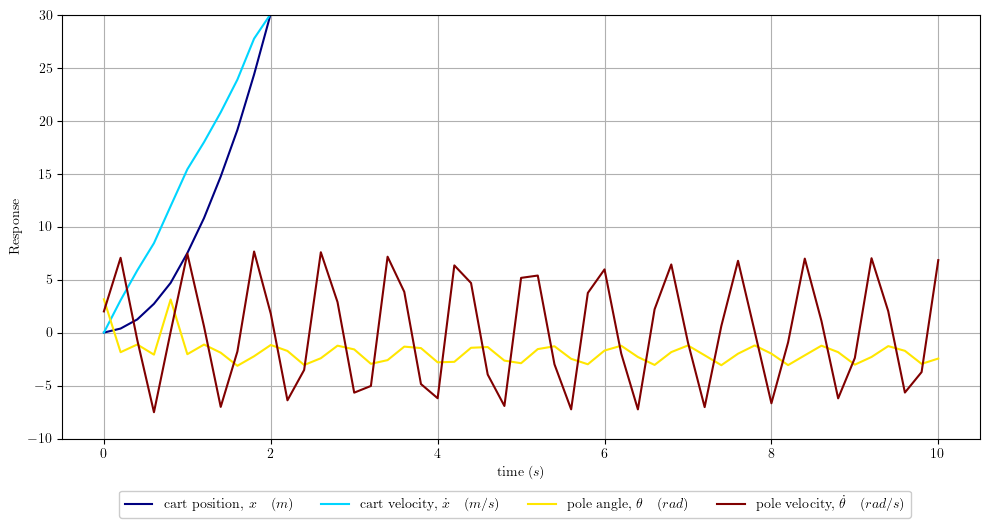

In [30]:
from shared import plot_rollout_single

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')


plot_rollout_single(x2, y2, ax, fig, color=colors, linestyle='solid', legend=True)

lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=4)
ax.set(ylim=(-10, 30))
# fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]")

In [ ]:
# Here we exeperiment with manual application of force to get a gist of whats happening

[ 3.14159265 -2.19482194 -1.59078198 -2.15383956  1.84127673 -0.26605577
  2.92182441  0.14591204 -1.55500817  2.67059269  2.17865155  2.67012333
  2.64901041 -2.92373724 -1.44670475 -0.78253571 -0.04940523  0.51623917
  0.40323649  1.04776671 -3.11013166 -1.03167847 -0.46913651 -0.70988245
 -0.82528086 -1.81749337  2.64417706  1.67750123  1.70292363 -3.02528576
 -0.80367518  1.40667903 -1.93153589 -0.56768065 -1.06367814 -3.11161457
  0.41062309 -2.41896147  1.13388612  0.08099805  0.93442481 -3.02873689
 -0.8442225   0.68141569  2.69864051 -1.18243006  0.27992487  1.93280037
 -1.77495265 -0.23491528  1.11972538]


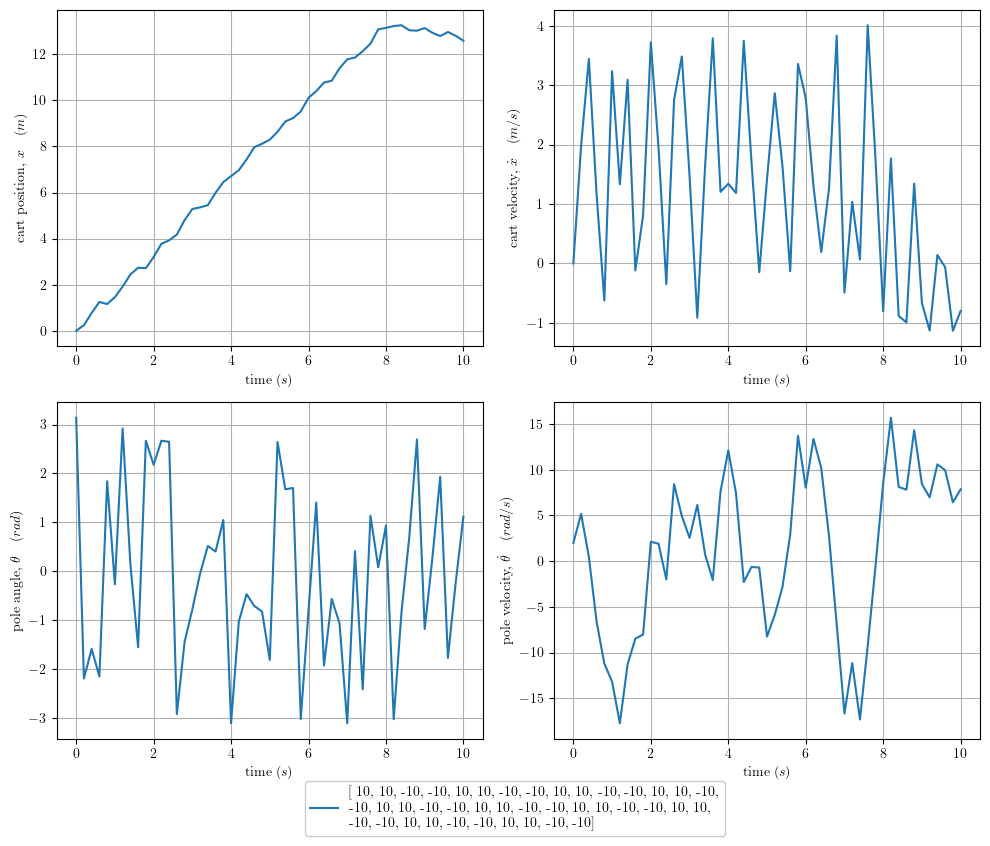

In [18]:
from shared import np_to_string

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

s0 = np.array([0, 0, np.pi, 2, 0])
action_seq = np.array([20] * 10)
action_seq2 = np.array([10, 10, -10, -10] * 10)

x, y = target.simulate_with_action(state=s0, action_seq=action_seq, remap=True, time=10)
x2, y2 = target.simulate_with_action(state=s0, action_seq=action_seq2, remap=True, time=10)

# plot_rollout(x, y, axs, fig, label=np_to_string(action_seq))
plot_rollout(x2, y2, axs, fig, label=np_to_string(action_seq2))
print(y2[:, 2])

fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

In [5]:
# Hence, we build a controller that applies the force at the resonant frequency

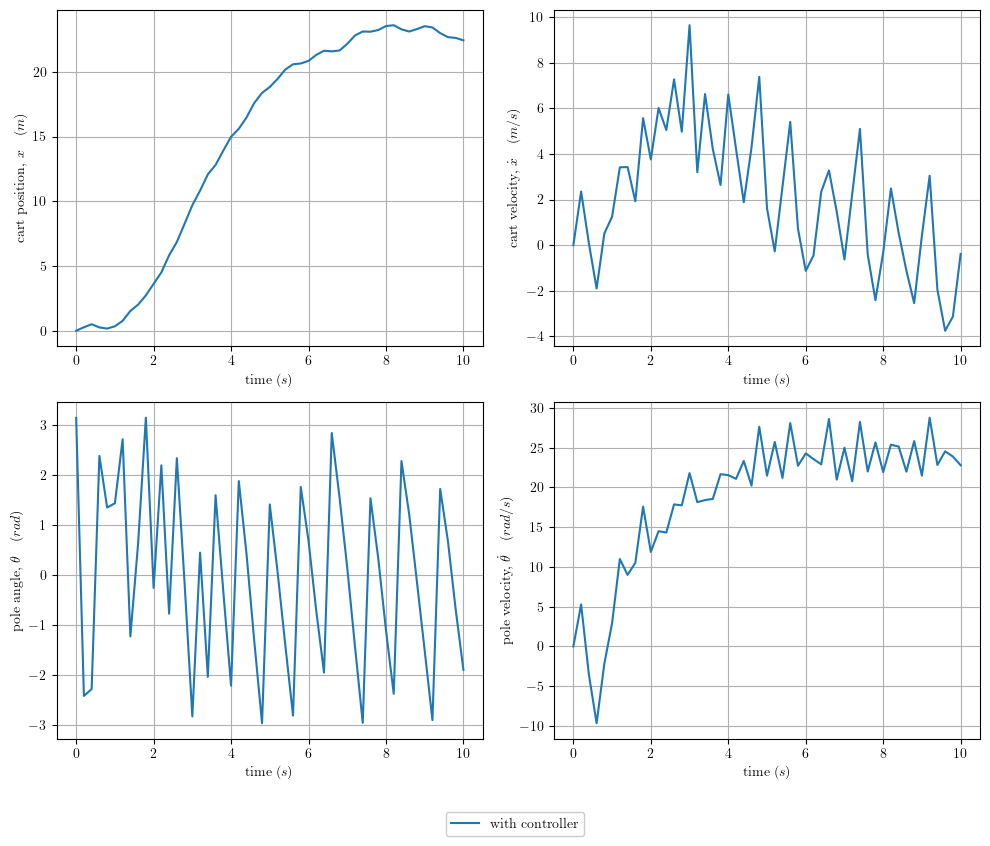

In [8]:
from NonLinearController_ import OscillatingController2

osc_controller2 = OscillatingController2()

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

s0 = np.array([0, 0, np.pi, 0, 0])
x, y = target.simulate_with_feedback(state=s0, remap=True, controller=osc_controller2, time=10)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)


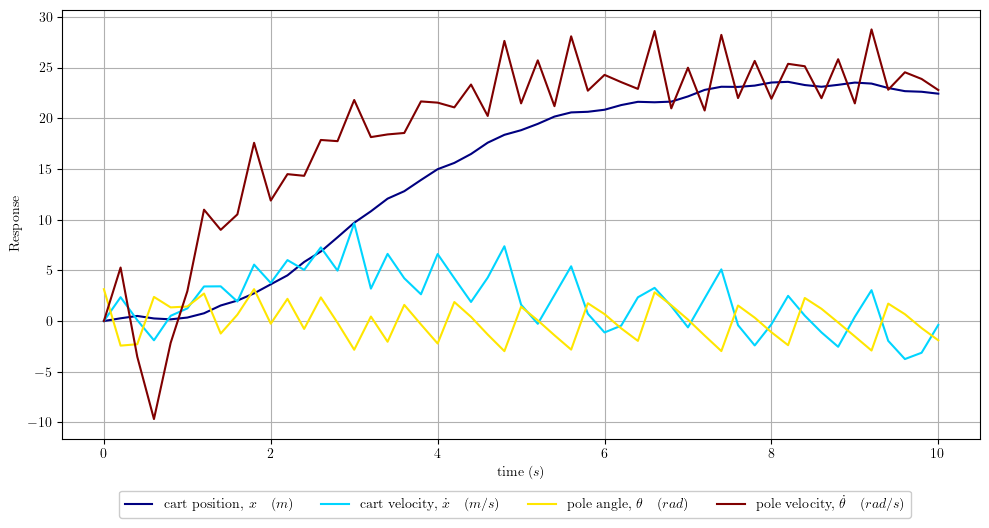

In [9]:
from shared import plot_rollout_single

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')


plot_rollout_single(x, y, ax, fig, color=colors, linestyle='solid', legend=True)

lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=4)
# fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]")

In [20]:
y[0:10]


array([[ 0.        ,  0.        ,  3.14159265,  0.        ],
       [ 0.27075419,  2.35163659, -2.42495233,  5.27821928],
       [ 0.50185385,  0.08799505, -2.28824236, -3.52303097],
       [ 0.25546746, -1.90060153,  2.38062208, -9.66836432],
       [ 0.16818774,  0.51610693,  1.34676439, -2.15780741],
       [ 0.34395644,  1.24783025,  1.43247604,  2.94037778],
       [ 0.76576535,  3.41165109,  2.71398197, 10.98451494],
       [ 1.53438981,  3.42327665, -1.23238411,  8.99645688],
       [ 2.01906576,  1.9224801 ,  0.63026986, 10.52242582],
       [ 2.73200047,  5.56495142,  3.1450305 , 17.58237897]])

In [ ]:
# Changing the basis functions to be nearer to 0.1 causes the omega to explode
#         xi[:, 0] = xi[:, 0] * 0.1
#         xi[:, 1] = xi[:, 1] * 0.1
#         xi[:, 2] = xi[:, 2] * np.pi
#         xi[:, 3] = xi[:, 3] * 0.1

Optimized: [136.48,  92.04,  12.81,  -2.46,   4.84, -19.66,  28.66,   0.55]


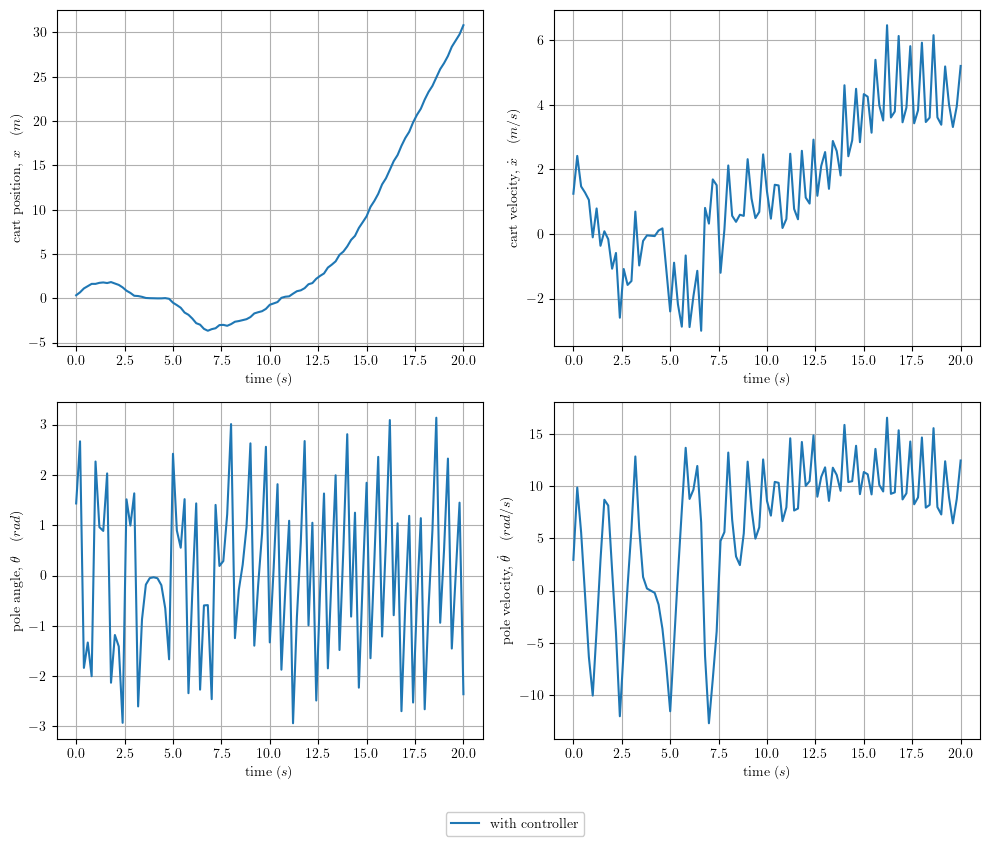

In [10]:
from optimizer import Optimizer

optimizer = Optimizer()


controller = NonLinearController.get_non_linear_controller(m=3)


# s0 = np.array([ 0, 0, np.pi, 0, 0.])
# s0 = np.array([ 1.06607997,  0.90819568,  1.68756197,  1.70688629, 0.])
s0 =np.array([0.34395644,  1.24783025,  1.43247604,  2.94037778, 0])

goal = np.array([ 0, 0, 0, 0])

temp = controller.xi[...]
# temp[:, 2] = np.ones_like(temp[:, 2]) * 0
# temp[:, 0] = temp[:, 0] * 2 - 1
# temp[:, 1] = temp[:, 1] * 4 - 2
# temp[:, 3] = temp[:, 3] * 4 - 2

controller.xi[...] = temp
# controller.w = np.array([ 1, 1, 1, 1]) * 6
# omega = controller.omega = np.ones(controller.xi.shape[0]) * 10
# omega = controller.omega = np.array([ 18.99,  42.12,  16.65,  -2.14,   7.87, -43.85,  30.29,  21.11])
omega = controller.omega = np.array([ 32.67,  71.91,  16.48,  -2.99,  12.65, -33.94,  13.91,  -8.8])



controller.w = np.array([ 5.82882224,  2.20082917, 19.37292826,  2.02057818])

omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega, verbose=False, loss_func=4, time=4, remap=True, target=goal)
controller.omega = omega_opt 
print("Optimized:", np_to_string(controller.omega))

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

In [11]:
# Zoom in into a shorter time horizon

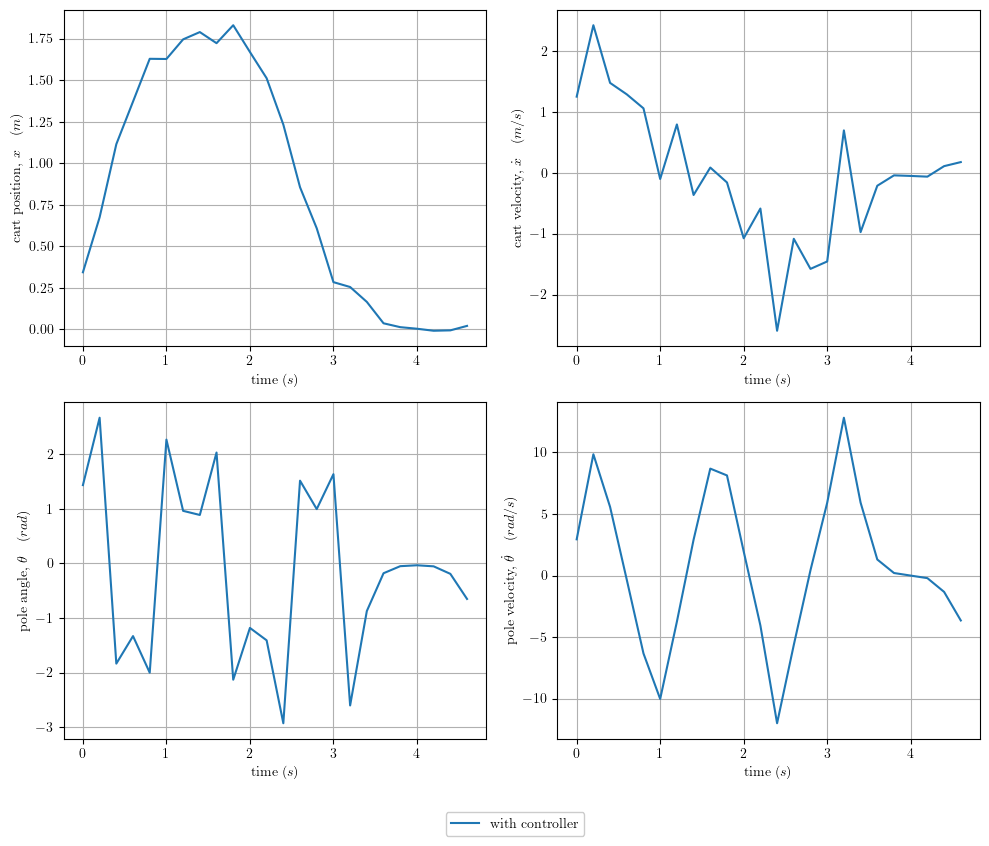

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=4.5)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

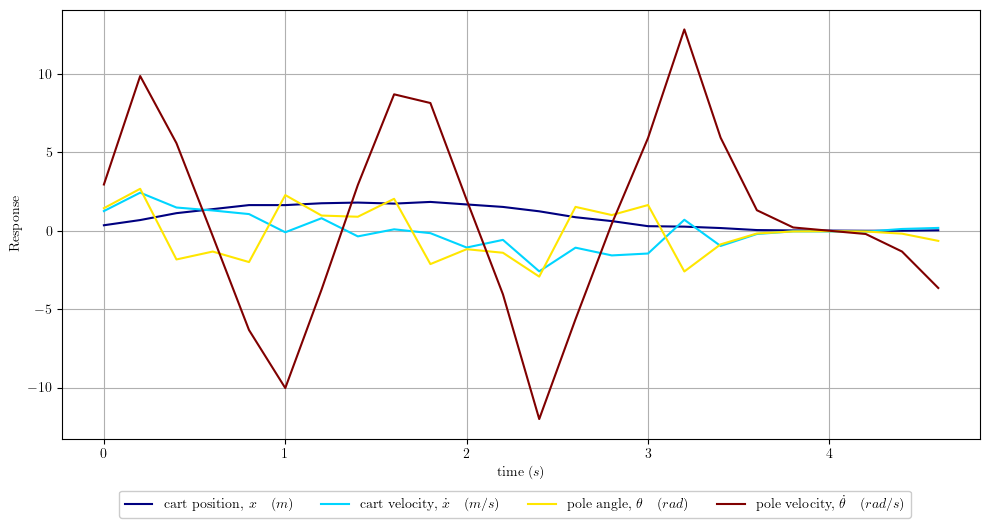

In [14]:
from shared import plot_rollout_single

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')


plot_rollout_single(x, y, ax, fig, color=colors, linestyle='solid', legend=True)

lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=4)
# fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]")

In [26]:
y[:20]

array([[  0.34395644,   1.24783025,   1.43247604,   2.94037778],
       [  0.6746523 ,   2.41996084,   2.66686033,   9.85231087],
       [  1.11459827,   1.47353523,  -1.83602913,   5.57458657],
       [  1.37096974,   1.28543477,  -1.33208644,  -0.34429327],
       [  1.6282624 ,   1.05590918,  -2.00199842,  -6.33326477],
       [  1.62716129,  -0.10338059,   2.26566795, -10.0313535 ],
       [  1.74523201,   0.79159679,   0.96144251,  -3.75427411],
       [  1.78902798,  -0.36590475,   0.88610537,   2.90996809],
       [  1.72232168,   0.08435855,   2.02903494,   8.6865818 ],
       [  1.83032707,  -0.16058678,  -2.13091914,   8.13243786],
       [  1.66929247,  -1.0760034 ,  -1.18227665,   1.95917641],
       [  1.51151415,  -0.58839921,  -1.40944889,  -4.05921539],
       [  1.23245319,  -2.59398602,  -2.92807404, -12.00543279],
       [  0.85567338,  -1.08499572,   1.51413197,  -5.64348041],
       [  0.60858881,  -1.57851771,   0.99339187,   0.43576094],
       [  0.28465027,  -1

In [ ]:
# Now get linear controller

In [21]:
from LinearController_ import LinearController

controller = LinearController.get_linear_controller()
controller.get_params()

p0 = np.array([ 3,  2.20082917, 19.37292826,  3.02057818])

s0 = np.array([-0.01064276,  0.02178444, -0.06973141,  0.01568978, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)

p_opt, loss

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
controller.p = p_opt

x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=30)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

NameError: name 'optimizer' is not defined

In [6]:
# Final model

In [15]:
from NonLinearController_ import EnsembleController, OscillatingController2, NonLinearController
from LinearController_ import LinearController


controller_1 = OscillatingController2()

controller_2 = NonLinearController.get_non_linear_controller(m=3)

controller_3 = LinearController.get_linear_controller()



# Setup paramters
controller_2.omega = np.array([136.48,  92.04,  12.81,  -2.46,   4.84, -19.66,  28.66,   0.55])
controller_2.w = np.array([ 5.82882224,  2.20082917, 19.37292826,  2.02057818])

# Setup paramters
controller_3.p = np.array([ 1.82882224,  2.20082917, 19.37292826,  3.02057818])

# Setup ensemble
e_controller = EnsembleController([controller_1, controller_2, controller_3])

# Start state
s0 = np.array([0, 0, np.pi, 0, 0])


[0.34395644 1.24783025 1.43247604 2.94037778]
[ 0.00332734 -0.05234914 -0.03700941 -0.01878363]


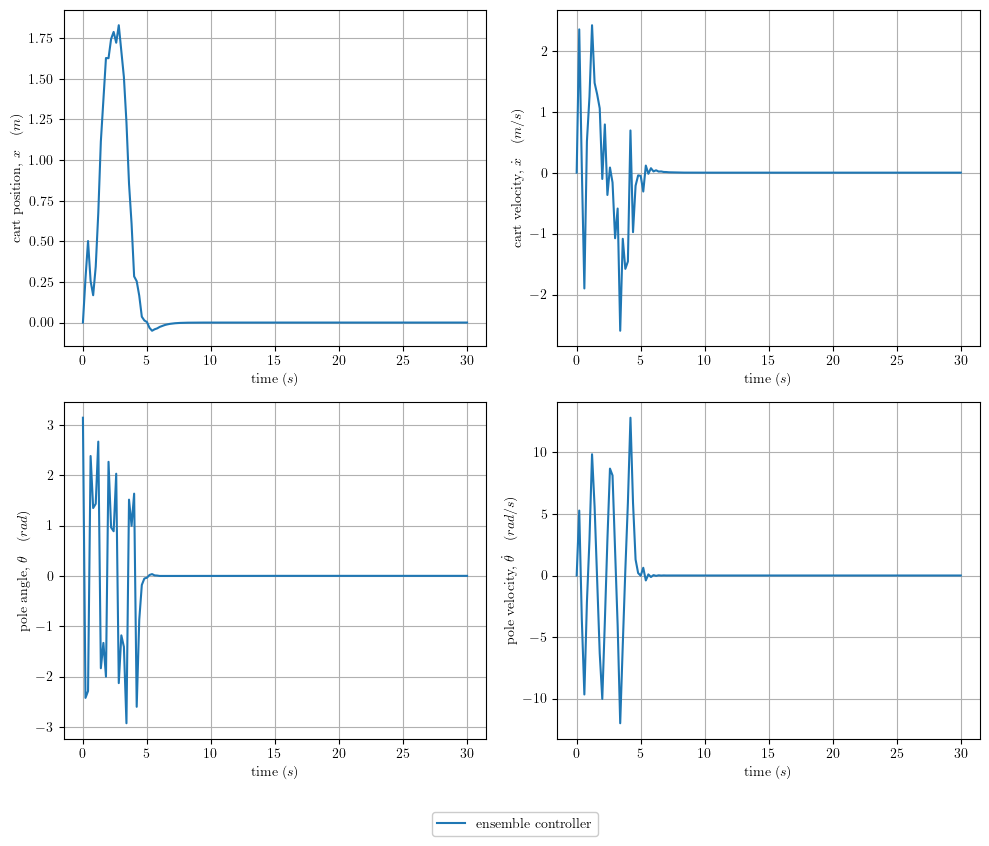

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=e_controller, time=30)

plot_rollout(x_target, y_target, axs, fig, label='ensemble controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

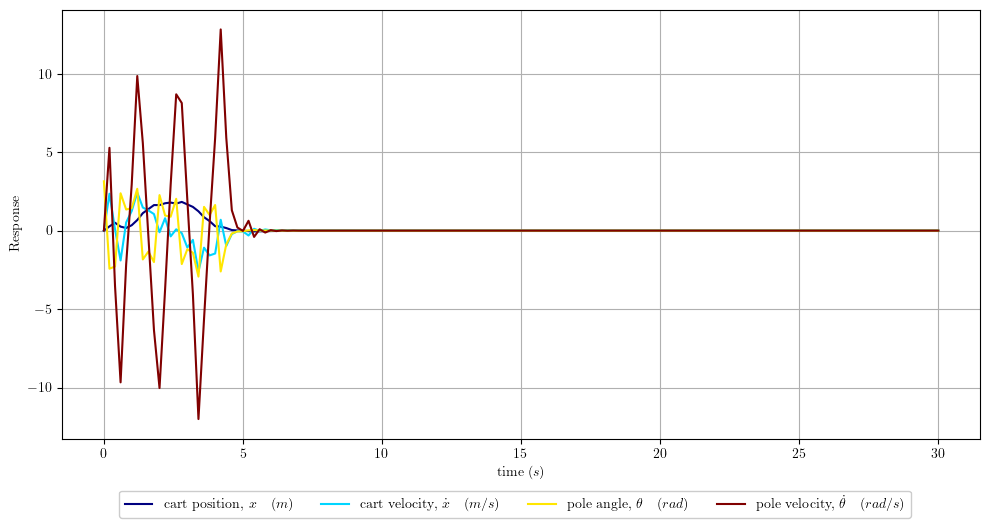

In [18]:
from shared import plot_rollout_single

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')


plot_rollout_single(x_target, y_target, ax, fig, color=colors, linestyle='solid', legend=True)

lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=4)
# fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]")